 The following command installs YoloV3-TF2 directly from it's GitHub repository.....cause its not available directly through PIP or CONDA

In [1]:
%pip install git+https://github.com/zzh8829/yolov3-tf2.git@master

  Cloning https://github.com/zzh8829/yolov3-tf2.git (to revision master) to c:\users\katara~1\appdata\local\temp\pip-req-build-79uwx63c
  Created wheel for yolov3-tf2: filename=yolov3_tf2-0.1-py3-none-any.whl size=9301 sha256=e38e0e69939e52e9c917e7aaca59129c9b0b2e3f3be4b518d2f67713850cedca
  Stored in directory: C:\Users\KATARA~1\AppData\Local\Temp\pip-ephem-wheel-cache-91ttznjk\wheels\dc\40\57\f6ce9c0aa58da78f10d29a11476132dbf0a616bb92826be28f
Successfully built yolov3-tf2
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/zzh8829/yolov3-tf2.git 'C:\Users\KATARA~1\AppData\Local\Temp\pip-req-build-79uwx63c'


<hr>Before you can make use of YoloV3-TF2 there are several files you must obtain:

- ***yolov3.weights*** - These are the pre-trained weights provided by the author of YOLO.
- ***convert.py*** - This is a Python script that converts yolov3.weights into a TensorFlow compatible weight format.
- ***coco.names*** - The names of the 80 items that the yolov3.weights neural network was trained to recognize.
- ***yolov3.tf*** - The YOLO weights converted to a format that TensorFlow can use directly.

In [1]:
import tensorflow as tf
import os

ROOT = os.path.join(os.getcwd(),'data')

filename_darknet_weights = tf.keras.utils.get_file(os.path.join(ROOT,'yolov3.weights'),origin='https://pjreddie.com/media/files/yolov3.weights')
TINY = False

filename_convert_script = tf.keras.utils.get_file(os.path.join(os.getcwd(),'convert.py'),origin='https://raw.githubusercontent.com/zzh8829/yolov3-tf2/master/convert.py')

filename_classes = tf.keras.utils.get_file(os.path.join(ROOT,'coco.names'),origin='https://raw.githubusercontent.com/zzh8829/yolov3-tf2/master/data/coco.names')

filename_converted_weights = os.path.join(ROOT,'yolov3.tf')

The weights provided by the original authors of YOLO is not directly compatible with TensorFlow. Because of this, it is necessary first to convert the YOLO provided weights into a TensorFlow compatible format. The following code does this conversion. This process does not need to be repeated by the program. Once the conversion script processes YOLO weights the saved to the yolov3.tf YOLO can reuse these converted wights. The following code performs this conversion.

In [2]:
import sys
!{sys.executable} "{filename_convert_script}" --weights "{filename_darknet_weights}" --output "{filename_converted_weights}"

Model: "yolov3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, None,  0                                            
__________________________________________________________________________________________________
yolo_darknet (Model)            ((None, None, None,  40620640    input[0][0]                      


2020-04-11 15:24:28.354910: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library cudart64_101.dll
2020-04-11 15:24:30.879952: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library nvcuda.dll
2020-04-11 15:24:31.801703: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1050 Ti computeCapability: 6.1
coreClock: 1.62GHz coreCount: 6 deviceMemorySize: 4.00GiB deviceMemoryBandwidth: 104.43GiB/s
2020-04-11 15:24:31.802185: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library cudart64_101.dll
2020-04-11 15:24:31.854583: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library cublas64_10.dll
2020-04-11 15:24:31.896121: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library cufft64_10.dll
2

__________________________________________________________________________________________________
yolo_conv_0 (Model)             (None, None, None, 5 11024384    yolo_darknet[1][2]               
__________________________________________________________________________________________________
yolo_conv_1 (Model)             (None, None, None, 2 2957312     yolo_conv_0[1][0]                
                                                                 yolo_darknet[1][1]               
__________________________________________________________________________________________________
yolo_conv_2 (Model)             (None, None, None, 1 741376      yolo_conv_1[1][0]                
                                                                 yolo_darknet[1][0]               
__________________________________________________________________________________________________
yolo_output_0 (Model)           (None, None, None, 3 4984063     yolo_conv_0[1][0]                
__________

I0411 15:24:40.419290  3820 utils.py:45] yolo_darknet/conv2d_40 bn
I0411 15:24:40.431001  3820 utils.py:45] yolo_darknet/conv2d_41 bn
I0411 15:24:40.437833  3820 utils.py:45] yolo_darknet/conv2d_42 bn
I0411 15:24:40.472549  3820 utils.py:45] yolo_darknet/conv2d_43 bn
I0411 15:24:40.627913  3820 utils.py:45] yolo_darknet/conv2d_44 bn
I0411 15:24:40.635715  3820 utils.py:45] yolo_darknet/conv2d_45 bn
I0411 15:24:40.883791  3820 utils.py:45] yolo_darknet/conv2d_46 bn
I0411 15:24:40.891590  3820 utils.py:45] yolo_darknet/conv2d_47 bn
I0411 15:24:41.122842  3820 utils.py:45] yolo_darknet/conv2d_48 bn
I0411 15:24:41.130650  3820 utils.py:45] yolo_darknet/conv2d_49 bn
I0411 15:24:41.307443  3820 utils.py:45] yolo_darknet/conv2d_50 bn
I0411 15:24:41.315251  3820 utils.py:45] yolo_darknet/conv2d_51 bn
I0411 15:24:41.535386  3820 utils.py:45] yolo_conv_0/conv2d_52 bn
I0411 15:24:41.542250  3820 utils.py:45] yolo_conv_0/conv2d_53 bn
I0411 15:24:41.728195  3820 utils.py:45] yolo_conv_0/conv2d_54 b

In [2]:
import time
from absl import app, flags, logging
from absl.flags import FLAGS
import cv2
import numpy as np
import tensorflow as tf
from yolov3_tf2.models import (YoloV3, YoloV3Tiny)
from yolov3_tf2.dataset import transform_images, load_tfrecord_dataset
from yolov3_tf2.utils import draw_outputs
import sys
from PIL import Image, ImageFile
import requests

In [3]:
# Flags are used to define several options for YOLO.
flags.DEFINE_string('classes', filename_classes, 'path to classes file')
flags.DEFINE_string('weights', filename_converted_weights, 'path to weights file')
flags.DEFINE_boolean('tiny', False, 'yolov3 or yolov3-tiny')
flags.DEFINE_integer('size', 416, 'resize images to')
flags.DEFINE_string('tfrecord', None, 'tfrecord instead of image')
flags.DEFINE_integer('num_classes', 80, 'number of classes in the model')
FLAGS([sys.argv[0]])

# Locate devices to run YOLO on (e.g. GPU)
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
physical_devices

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

It is important to understand that Keras flags can only be defined once. If you are going to classify more than one image, make sure that you do not define the flags additional times.

The following code initializes a YoloV3-TF2 classification object. The weights are loaded, and the object is ready for use as the yolo variable. It is not necessary to reload the weights and obtain a new yolo variable for each classification.

In [5]:
# This example does not use the "Tiny version"
if FLAGS.tiny:
    yolo = YoloV3Tiny(classes=FLAGS.num_classes)
else:
    yolo = YoloV3(classes=FLAGS.num_classes)

# Load weights and classes
yolo.load_weights(FLAGS.weights).expect_partial()
print('weights loaded')

class_names = [c.strip() for c in open(FLAGS.classes).readlines()]
print('classes loaded')

weights loaded
classes loaded


Next, we obtain an image to classify. For this example, the program loads the image from a URL. YoloV3-TF2 expects that the image is in the format of a Numpy array. An image file, such as JPEG or PNG, is converted into this raw Numpy format by calling the TensorFlow decode_image function. YoloV3-TF2 can obtain images from other sources, so long as the program first decodes them to raw Numpy format. The following code obtains the image in this format.

In [27]:
url = "https://ca-times.brightspotcdn.com/dims4/default/83b6fc5/2147483647/strip/true/crop/2048x1261+0+0/resize/840x517!/quality/90/?url=https%3A%2F%2Fcalifornia-times-brightspot.s3.amazonaws.com%2Fb8%2Fdc%2F6a13ce842eaaa501f67d46755751%2Fla-et-csi-finale-1-jpg-20150925"
respone = requests.get(url)
img_raw = tf.image.decode_image(respone.content,channels=3)

In [28]:
img_raw

<tf.Tensor: shape=(517, 840, 3), dtype=uint8, numpy=
array([[[  0,  33,  38],
        [ 17,  56,  61],
        [ 66, 107, 113],
        ...,
        [ 33,  89, 114],
        [ 32,  89, 116],
        [ 30,  90, 116]],

       [[  0,  18,  29],
        [  0,  10,  20],
        [  5,  39,  51],
        ...,
        [ 37,  91, 117],
        [ 33,  90, 117],
        [ 30,  87, 114]],

       [[  0,  15,  40],
        [  0,  18,  43],
        [ 11,  31,  56],
        ...,
        [ 43,  94, 121],
        [ 36,  90, 118],
        [ 29,  85, 112]],

       ...,

       [[167, 223, 236],
        [167, 224, 235],
        [170, 224, 236],
        ...,
        [173, 206, 213],
        [176, 209, 216],
        [180, 213, 220]],

       [[170, 226, 239],
        [172, 226, 238],
        [176, 228, 241],
        ...,
        [178, 211, 218],
        [180, 213, 220],
        [183, 216, 223]],

       [[174, 227, 241],
        [175, 229, 241],
        [178, 230, 243],
        ...,
        [179, 212, 21

In [15]:
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60.
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

In [32]:
# Preprocess image
img = tf.expand_dims(img_raw, 0)
img = transform_images(img, FLAGS.size)

# Desired threshold (any sub-image below this confidence level will be ignored.)
FLAGS.yolo_score_threshold = 0.5

# Recognize and report results
t1 = time.time()
boxes, scores, classes, nums = yolo(img)
t2 = time.time()
print(f"Prediction time: {hms_string(t2 - t1)}")

Prediction time: 0:00:00.24


In [33]:
print('detections:')
for i in range(nums[0]):
    cls = class_names[int(classes[0][i])]
    score = np.array(scores[0][i])
    box = np.array(boxes[0][i])
    print(f"\t{cls}, {score}, {box}")

detections:
	person, 0.9936159253120422, [0.7339097  0.14368919 0.93019354 0.8722385 ]
	person, 0.9913256764411926, [0.520268   0.05571015 0.6442928  0.5131789 ]
	laptop, 0.9527037143707275, [0.         0.34267327 0.22390795 0.53096175]
	person, 0.910692572593689, [0.25633064 0.07632099 0.38793334 0.413719  ]
	chair, 0.7199706435203552, [0.7708316  0.61173695 0.9532614  0.9702465 ]
	laptop, 0.7097027897834778, [0.21963888 0.40751642 0.52363497 0.5671021 ]


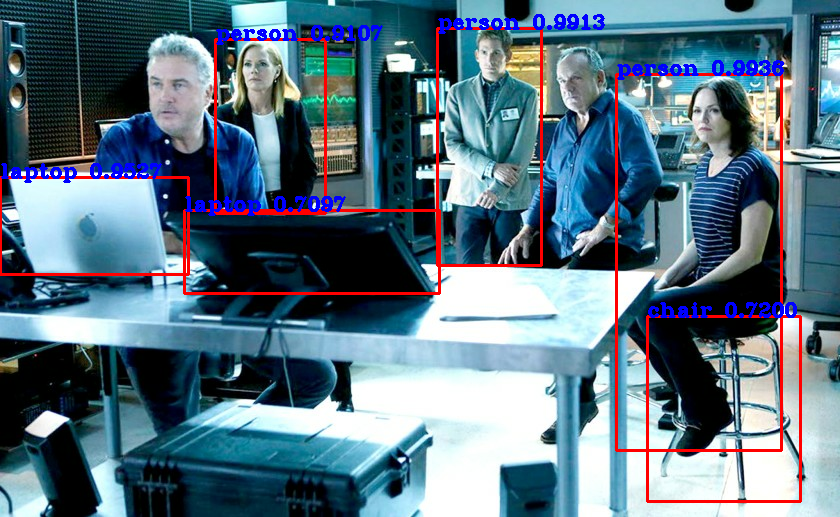

In [34]:
# Display image using YOLO library's built in function
img = img_raw.numpy()
img = draw_outputs(img, (boxes, scores, classes, nums), class_names)

#cv2.imwrite(FLAGS.output, img) # Save the image
display(Image.fromarray(img, 'RGB')) # Display the image